Number of snow pixels in ROI: 2281582


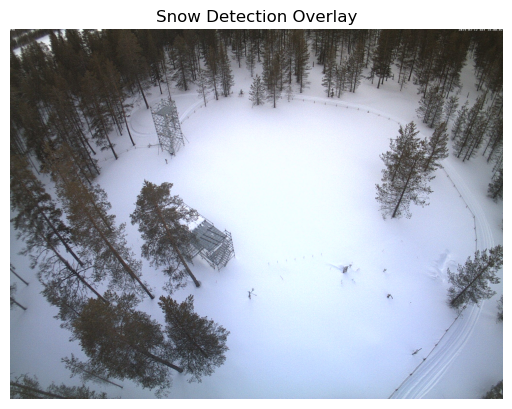

Number of snow pixels in ROI: 2281582


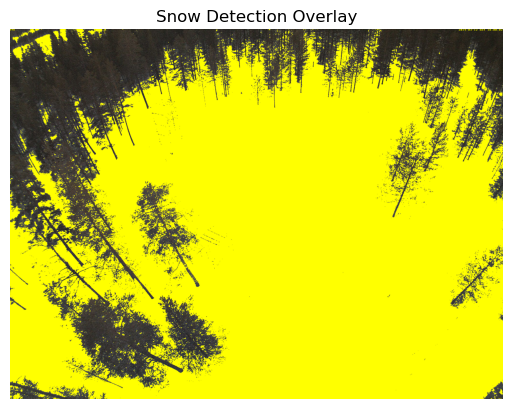

Number of snow pixels in ROI: 2491155


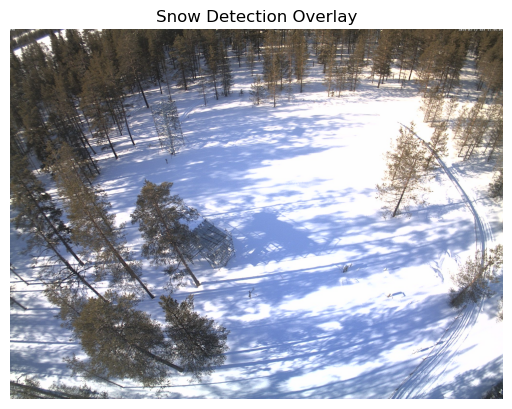

Number of snow pixels in ROI: 2491155


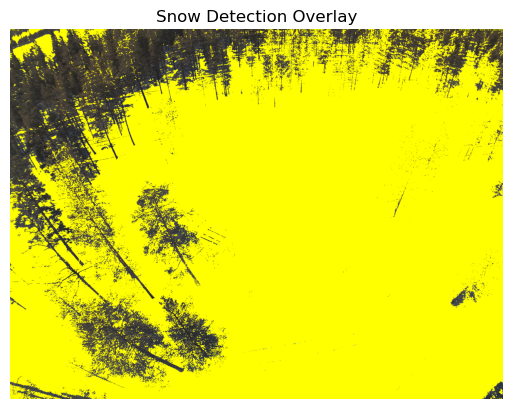

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def load_image(image_path):
    """Load an image from a file."""
    return cv2.imread(image_path, cv2.IMREAD_COLOR)

def define_roi(image):
    """Define regions of interest. This example uses a hardcoded ROI."""
    # Example: a rectangular ROI
    roi_mask = np.zeros(image.shape[:2], dtype=np.uint8)
    cv2.rectangle(roi_mask, (0, 0), (image.shape[1],image.shape[0]), 255, -1)  # (x1, y1), (x2, y2)
    return roi_mask

def detect_snow_pixels(image, roi_mask, snow_thresholds):
    """Detect snow pixels based on thresholds and within ROI."""
    # Convert image to HSV for better thresholding
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower_thresh, upper_thresh = snow_thresholds
    
    # Create a binary mask for snow detection
    snow_mask = cv2.inRange(hsv, lower_thresh, upper_thresh)
    
    # Apply ROI mask
    snow_mask = cv2.bitwise_and(snow_mask, snow_mask, mask=roi_mask)
    
    # Count matching pixels
    snow_pixel_count = cv2.countNonZero(snow_mask)
    
    return snow_mask, snow_pixel_count

def overlay_snow_pixels(image, snow_mask, color=(0, 255, 255), transparency=0.0):
    """Overlay snow mask onto the original image."""
    overlay = image.copy()
    overlay[snow_mask > 0] = color
    result = cv2.addWeighted(image, transparency, overlay, 1.0-transparency, 0)
    return result

for i in range(1,3):

    # Parameters
    image_path = f"sodankyla{i}.jpg"  # Replace with your image path
    snow_thresholds = (np.array([0, 0, 90]), np.array([255, 125, 255]))  # Example thresholds for snow in HSV
    
    # Main Script
    image = load_image(image_path)
    roi_mask = define_roi(image)
    snow_mask, snow_pixel_count = detect_snow_pixels(image, roi_mask, snow_thresholds)
    
    overlay = overlay_snow_pixels(image, snow_mask, transparency=1.0)
    
    # Display Results
    print(f"Number of snow pixels in ROI: {snow_pixel_count}")
    plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
    plt.title("Snow Detection Overlay")
    plt.axis("off")
    plt.show()

    overlay = overlay_snow_pixels(image, snow_mask)
    
    # Display Results
    print(f"Number of snow pixels in ROI: {snow_pixel_count}")
    plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
    plt.title("Snow Detection Overlay")
    plt.axis("off")
    plt.show()

(1536, 2048, 3)
Number of snow pixels in ROI (LAB): 2293434


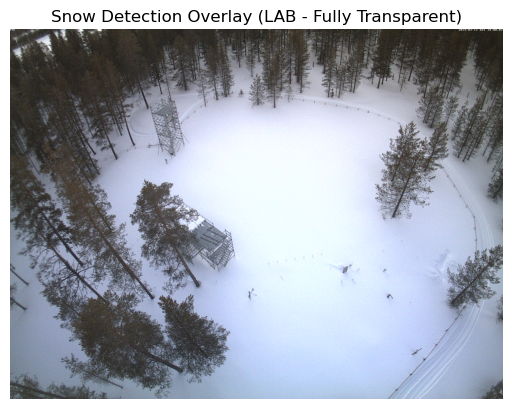

Number of snow pixels in ROI (LAB): 2293434


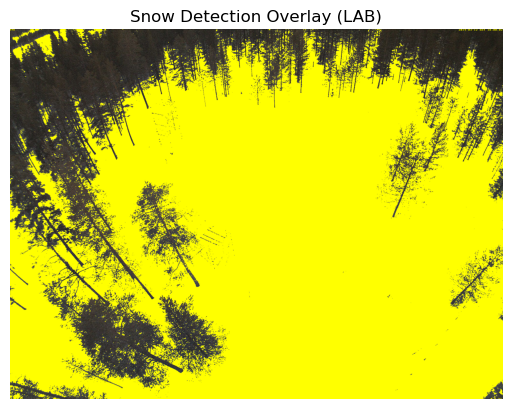

(1536, 2048, 3)
Number of snow pixels in ROI (LAB): 2411170


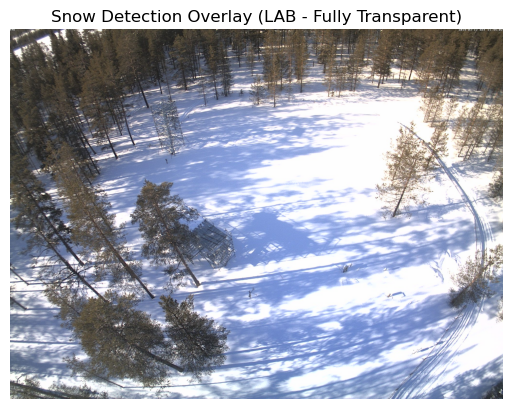

Number of snow pixels in ROI (LAB): 2411170


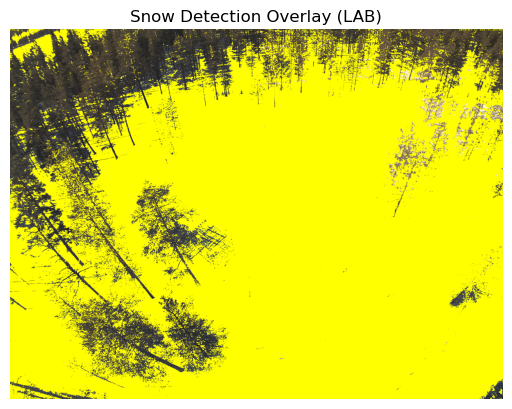

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def load_image(image_path):
    """Load an image from a file."""
    return cv2.imread(image_path, cv2.IMREAD_COLOR)

def define_roi(image):
    """Define regions of interest. This example uses a hardcoded ROI."""
    # Example: a rectangular ROI
    roi_mask = np.zeros(image.shape[:2], dtype=np.uint8)
    cv2.rectangle(roi_mask, (0, 0), (image.shape[1], image.shape[0]), 255, -1)  # (x1, y1), (x2, y2)
    return roi_mask

def detect_snow_pixels_lab(image, roi_mask, snow_thresholds):
    """Detect snow pixels based on thresholds and within ROI using LAB color space."""

    lower_thresh, upper_thresh = snow_thresholds
    
    # Convert image to LAB for better thresholding
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    
    # Create a binary mask for snow detection
    snow_mask = cv2.inRange(lab, lower_thresh, upper_thresh)
    
    # Apply ROI mask
    snow_mask = cv2.bitwise_and(snow_mask, snow_mask, mask=roi_mask)
    
    # Count matching pixels
    snow_pixel_count = cv2.countNonZero(snow_mask)
    
    return snow_mask, snow_pixel_count

def overlay_snow_pixels(image, snow_mask, color=(0, 255, 255), transparency=0.0):
    """Overlay snow mask onto the original image."""
    overlay = image.copy()
    overlay[snow_mask > 0] = color
    result = cv2.addWeighted(image, transparency, overlay, 1.0 - transparency, 0)
    return result

for i in range(1,16):

    # Parameters
    image_path = f"sodankyla{i}.jpg"  # Replace with your image path
    snow_thresholds_lab = (np.array([90, 0, 0]), np.array([255, 140, 140]))  # Example thresholds for snow in LAB
    
    # Main Script
    image = load_image(image_path)
    roi_mask = define_roi(image)
    snow_mask_lab, snow_pixel_count_lab = detect_snow_pixels_lab(image, roi_mask, snow_thresholds_lab)

    overlay_lab_transparent = overlay_snow_pixels(image, snow_mask_lab, transparency=1.0)
    
    # Display Results
    print(f"Number of snow pixels in ROI (LAB): {snow_pixel_count_lab}")
    plt.imshow(cv2.cvtColor(overlay_lab_transparent, cv2.COLOR_BGR2RGB))
    plt.title("Snow Detection Overlay (LAB - Fully Transparent)")
    plt.axis("off")
    plt.show()
    
    overlay_lab = overlay_snow_pixels(image, snow_mask_lab)
    
    # Display Results
    print(f"Number of snow pixels in ROI (LAB): {snow_pixel_count_lab}")
    plt.imshow(cv2.cvtColor(overlay_lab, cv2.COLOR_BGR2RGB))
    plt.title("Snow Detection Overlay (LAB)")
    plt.axis("off")
    plt.show()

In [7]:
# import cv2
# import numpy as np
# from matplotlib import pyplot as plt
# from ipywidgets import interact, IntSlider
# import ipywidgets as widgets

# def load_image(image_path):
#     """Load an image from a file."""
#     return cv2.imread(image_path, cv2.IMREAD_COLOR)

# def define_roi(image):
#     """Define regions of interest. This example uses a hardcoded ROI."""
#     # Example: a rectangular ROI
#     roi_mask = np.zeros(image.shape[:2], dtype=np.uint8)
#     cv2.rectangle(roi_mask, (0, 0), (image.shape[1], image.shape[0]), 255, -1)  # (x1, y1), (x2, y2)
#     return roi_mask

# def detect_snow_pixels_lab(image, roi_mask, lower_thresh, upper_thresh):
#     """Detect snow pixels based on thresholds and within ROI using LAB color space."""
#     # Convert image to LAB for better thresholding
#     lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    
#     # Create a binary mask for snow detection
#     snow_mask = cv2.inRange(lab, lower_thresh, upper_thresh)
    
#     # Apply ROI mask
#     snow_mask = cv2.bitwise_and(snow_mask, snow_mask, mask=roi_mask)
    
#     # Count matching pixels
#     snow_pixel_count = cv2.countNonZero(snow_mask)
    
#     return snow_mask, snow_pixel_count

# def overlay_snow_pixels(image, snow_mask, color=(0, 255, 255), transparency=0.3):
#     """Overlay snow mask onto the original image."""
#     overlay = image.copy()
#     overlay[snow_mask > 0] = color
#     result = cv2.addWeighted(image, transparency, overlay, 1.0 - transparency, 0)
#     return result

# def update_thresholds(L_min, L_max, A_min, A_max, B_min, B_max):
#     """Update thresholds interactively and display the mask and overlay."""
#     lower_thresh = np.array([L_min, A_min, B_min])
#     upper_thresh = np.array([L_max, A_max, B_max])
    
#     snow_mask, snow_pixel_count = detect_snow_pixels(image, roi_mask, (lower_thresh, upper_thresh))
#     overlay = overlay_snow_pixels(image, snow_mask)
    
#     # Display results
#     plt.figure(figsize=(10, 10))
#     plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
#     plt.title(f"Snow Detection Overlay (LAB)\nSnow Pixels: {snow_pixel_count}")
#     plt.axis("off")
#     plt.show()

# # Load image and define ROI
# image_path = "sodankyla1.jpg"  # Replace with your image path
# image = load_image(image_path)
# roi_mask = define_roi(image)

# # Interactive sliders
# interact(
#     update_thresholds,
#     L_min=IntSlider(value=0, min=0, max=255, step=1, description='H Min'),
#     L_max=IntSlider(value=255, min=0, max=255, step=1, description='H Max'),
#     A_min=IntSlider(value=0, min=0, max=255, step=1, description='S Min'),
#     A_max=IntSlider(value=125, min=0, max=255, step=1, description='S Max'),
#     B_min=IntSlider(value=130, min=0, max=255, step=1, description='V Min'),
#     B_max=IntSlider(value=255, min=0, max=255, step=1, description='V Max')
# )
